**Instruction for POS Tagging Using RNNs with Arabic Dataset**

**Dataset:**
The dataset provided is named "Assignment 2 - Arabic POS.conllu". It contains labeled data for Arabic text with Part-of-Speech (POS) tags in CoNLL-U format.

**Objective:**
Your objective is to perform Part-of-Speech (POS) tagging on Arabic text using Recurrent Neural Networks (RNNs). Specifically, you will use the Universal POS (UPOS) tags for tagging. UPOS is a standardized set of POS tags that aims to cover all languages.

**Evaluation metric:**
Accuracy

**Instructions:**
1. **Data Preprocessing:**
   - Load the provided dataset "Assignment 2 - Arabic POS.conllu". You can use pyconll library
   - Preprocess the data as necessary, including tokenization

2. **Model Building:**
   - Design an RNN-based model architecture suitable for POS tagging. You may consider using recurrent layers such as (LSTM) or (GRU).
   - Define the input and output layers of the model. The input layer should accept sequences of tokens, and the output layer should produce the predicted UPOS tags for each token.

3. **Training:**

4. **Evaluation:**

**Additional Notes:**
- Make sure to document your code thoroughly and provide clear explanations for each step.
- Feel free to explore different RNN architectures, hyperparameters, and optimization techniques to improve the model's accuracy.

### Import used libraries

In [1]:
pip install pyconll

In [2]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 12.8 MB/s eta 0:00:00


In [3]:
import pyconll
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
import random
import re
import contractions
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from tqdm.auto import tqdm
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
import spacy
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
import pandas as pd


### Load Dataset

In [4]:
path = 'Assignment 2 - Arabic POS.conllu'

In [5]:
corpus = pyconll.load_from_file(path)

In [6]:
for sentence in corpus[:1]:
    # Iterate through each token in the sentence
    for token in sentence:
        # Access token attributes
        token_id = token.id
        word = token.form
        lemma = token.lemma
        Upos = token.upos
        upos = token.upos
        feats = token.feats
        head = token.head
        deprel = token.deprel

        # Process token data as needed
        print(f'Token ID: {token_id}, Word: {word}, Lemma: {lemma}, UPOS: {upos}, upos: {upos}, Features: {feats}, Head: {head}, Deprel: {deprel}')


Token ID: 1, Word: برلين, Lemma: بَرلِين, UPOS: X, upos: X, Features: {'Foreign': {'Yes'}}, Head: 2, Deprel: nsubj
Token ID: 2, Word: ترفض, Lemma: رَفَض, UPOS: VERB, upos: VERB, Features: {'Aspect': {'Imp'}, 'Gender': {'Fem'}, 'Mood': {'Ind'}, 'Number': {'Sing'}, 'Person': {'3'}, 'VerbForm': {'Fin'}, 'Voice': {'Act'}}, Head: 0, Deprel: root
Token ID: 3, Word: حصول, Lemma: حُصُول, UPOS: NOUN, upos: NOUN, Features: {'Case': {'Acc'}, 'Definite': {'Cons'}, 'Number': {'Sing'}}, Head: 2, Deprel: obj
Token ID: 4, Word: شركة, Lemma: شَرِكَة, UPOS: NOUN, upos: NOUN, Features: {'Case': {'Gen'}, 'Definite': {'Ind'}, 'Number': {'Sing'}}, Head: 3, Deprel: nmod
Token ID: 5, Word: اميركية, Lemma: أَمِيرِكِيّ, UPOS: ADJ, upos: ADJ, Features: {'Case': {'Gen'}, 'Definite': {'Ind'}, 'Gender': {'Fem'}, 'Number': {'Sing'}}, Head: 4, Deprel: amod
Token ID: 6, Word: على, Lemma: عَلَى, UPOS: ADP, upos: ADP, Features: {'AdpType': {'Prep'}}, Head: 7, Deprel: case
Token ID: 7, Word: رخصة, Lemma: رُخصَة, UPOS: NO

### Data splitting

In [7]:
def extract_splited_sents_from_data(data):
    '''retruns list of list of tokens in data'''
    sents_splited=[]
    for sent in data:
        sents_splited.append([token.form for token in sent])
    return sents_splited

def extract_POS_from_data(data,tag_type='xpos'):
    '''retruns list of list of POS tags for each sentence in data'''
    tags=[]
    if tag_type=='upos':
        for sent in data:
            tags.append([token.upos for token in sent])
    elif tag_type=='xpos':
        for sent in data:
            tags.append([token.xpos for token in sent])
    return tags

def extract_from_data(data,tag_type='xpos'):
    return extract_splited_sents_from_data(data),extract_POS_from_data(data,tag_type)

In [8]:
X,Y= extract_from_data(corpus)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

### Cleaning and Preprocessing

In [10]:
def get_tokenizer(text):
    tokenizer=tf.keras.preprocessing.text.Tokenizer(lower=False,filters=None)
    tokenizer.fit_on_texts(text)
    return  tokenizer
sent_tokenizer,upos_tag_tokenzier= get_tokenizer(X),get_tokenizer(Y)
print(len(sent_tokenizer.word_index),upos_tag_tokenzier.word_counts)

33496 OrderedDict([('X---------', 4125), ('VIIA-3FS--', 2518), ('N------S4R', 3559), ('N------S2I', 7078), ('A-----FS2I', 1814), ('P---------', 28834), ('N------S2R', 16069), ('G---------', 17839), ('A-----FS2D', 6091), ('Q---------', 4264), ('U---------', 9299), ('Y---------', 361), ('VP-A-3FS--', 2810), ('N------S1R', 3564), ('N------S2D', 16821), ('A-----FS1D', 1050), (None, 30519), ('SP---3FS2-', 2328), ('A-----MS2D', 4590), ('N------S4I', 2950), ('C---------', 20171), ('N------S4D', 2698), ('VIIA-3MS--', 3034), ('PI------4-', 4288), ('N------P2D', 7364), ('N------S1D', 3047), ('SR----FS2-', 886), ('N------P4R', 571), ('A-----FS4D', 732), ('N------P1R', 607), ('QX----F-2D', 6), ('VISA-3FS--', 448), ('QM-----S4R', 448), ('N------P4D', 767), ('VP-A-3MS--', 5311), ('SD----FS4-', 120), ('A-----MS1D', 1112), ('A-----MS4D', 775), ('N------D2R', 96), ('QX----F-2R', 14), ('N------P2I', 1894), ('SP---3MS4-', 1042), ('S---------', 967), ('F---------', 3006), ('N------P2R', 3416), ('VP-P-3MP-

In [11]:
MAX_SEQ_LEN = 160

In [12]:
def tokenize_and_pad_seqs(seqs,tokenizer):
    tokenized=tokenizer.texts_to_sequences(seqs)
    padded=tf.keras.preprocessing.sequence.pad_sequences(tokenized, maxlen= MAX_SEQ_LEN,value=0)
    return padded
X_train_token,X_test_token=[tokenize_and_pad_seqs(seqs,sent_tokenizer) \
                      for seqs in [x_train,x_test]]
y_train_token,y_test_token=[tokenize_and_pad_seqs(seqs,upos_tag_tokenzier) \
                                     for seqs in [y_train,y_test]]
print(len(X_train_token),len(X_test_token))

4860 1215


In [13]:
VOCAB_SIZE=len(sent_tokenizer.word_index)+1
print(VOCAB_SIZE)

33497


In [14]:
upos_TAG_VOCAB=len(upos_tag_tokenzier.word_index)+1
print(upos_TAG_VOCAB)

348


### Modelling

In [15]:
pip install livelossplot

In [16]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from livelossplot.tf_keras import PlotLossesCallback

In [17]:
input_word = Input(shape=(MAX_SEQ_LEN,))
model = Embedding(input_dim=VOCAB_SIZE,output_dim=50, input_length=MAX_SEQ_LEN)(input_word)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(upos_TAG_VOCAB, activation="softmax"))(model)
model = Model(input_word, out)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 160)]             0         
                                                                 
 embedding (Embedding)       (None, 160, 50)           1674850   
                                                                 
 bidirectional (Bidirection  (None, 160, 200)          120800    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 160, 348)          69948     
 ributed)                                                        
                                                                 
Total params: 1865598 (7.12 MB)
Trainable params: 1865598 (7.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

**Training the Model 🏃**

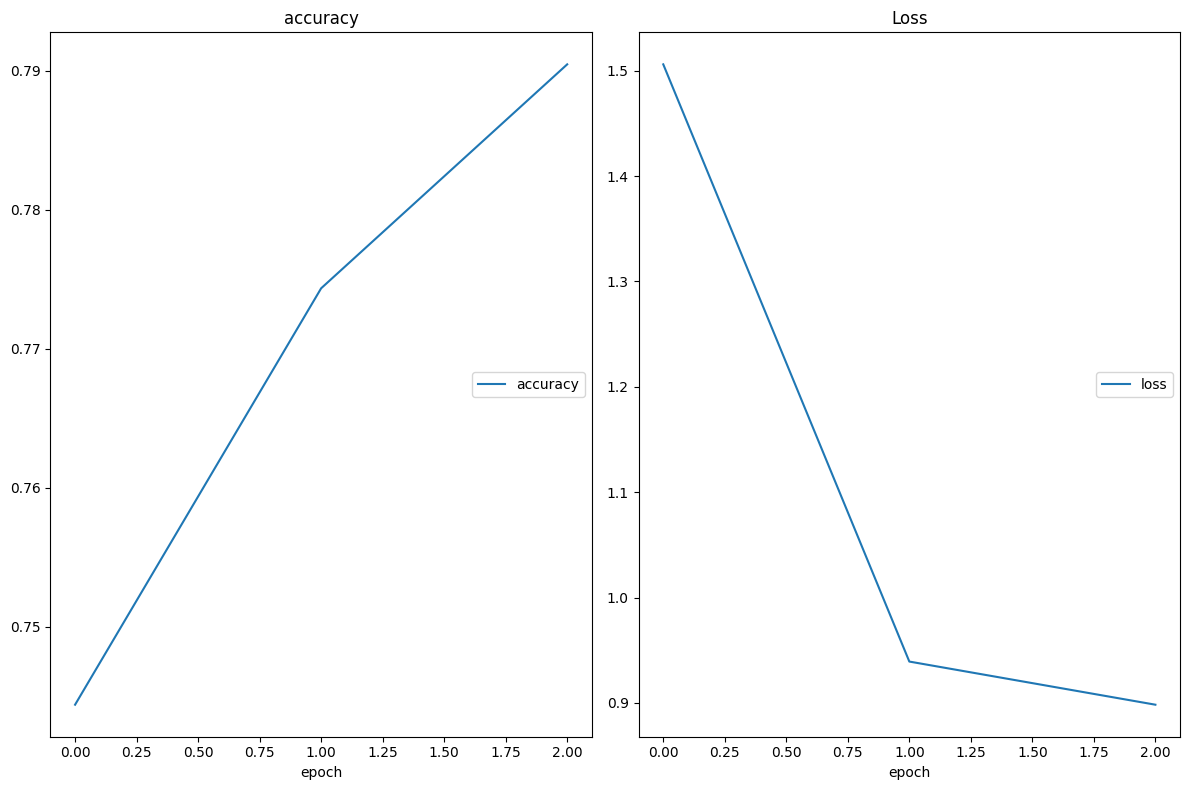

accuracy
	accuracy         	 (min:    0.744, max:    0.790, cur:    0.790)
Loss
	loss             	 (min:    0.898, max:    1.506, cur:    0.898)
152/152 [==============================] - 152s 1s/step - loss: 0.8983 - accuracy: 0.7905
CPU times: user 10min 9s, sys: 53.2 s, total: 11min 3s
Wall time: 8min 11s


In [19]:
%%time

chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history = model.fit(
    x=X_train_token,
    y=y_train_token,
    batch_size=32,
    epochs=3,
    callbacks=callbacks,
    verbose=1
)

#### Evaluation

**Evaluation metric:**
Accuracy

In [20]:
model.evaluate(X_test_token, y_test_token)

38/38 [==============================] - 4s 93ms/step - loss: 0.8661 - accuracy: 0.8080


[0.866086483001709, 0.8079783916473389]

### Enhancement

In [21]:
input_word = Input(shape=(MAX_SEQ_LEN,))
model2 = Embedding(input_dim=VOCAB_SIZE,output_dim=100, input_length=MAX_SEQ_LEN)(input_word)
model2 = Bidirectional(LSTM(units=300, return_sequences=True, recurrent_dropout=0.1))(model2)
out = TimeDistributed(Dense(upos_TAG_VOCAB, activation="softmax"))(model2)
model2 = Model(input_word, out)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 160, 100)          3349700   
                                                                 
 bidirectional_1 (Bidirecti  (None, 160, 600)          962400    
 onal)                                                           
                                                                 
 time_distributed_1 (TimeDi  (None, 160, 348)          209148    
 stributed)                                                      
                                                                 
Total params: 4521248 (17.25 MB)
Trainable params: 4521248 (17.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

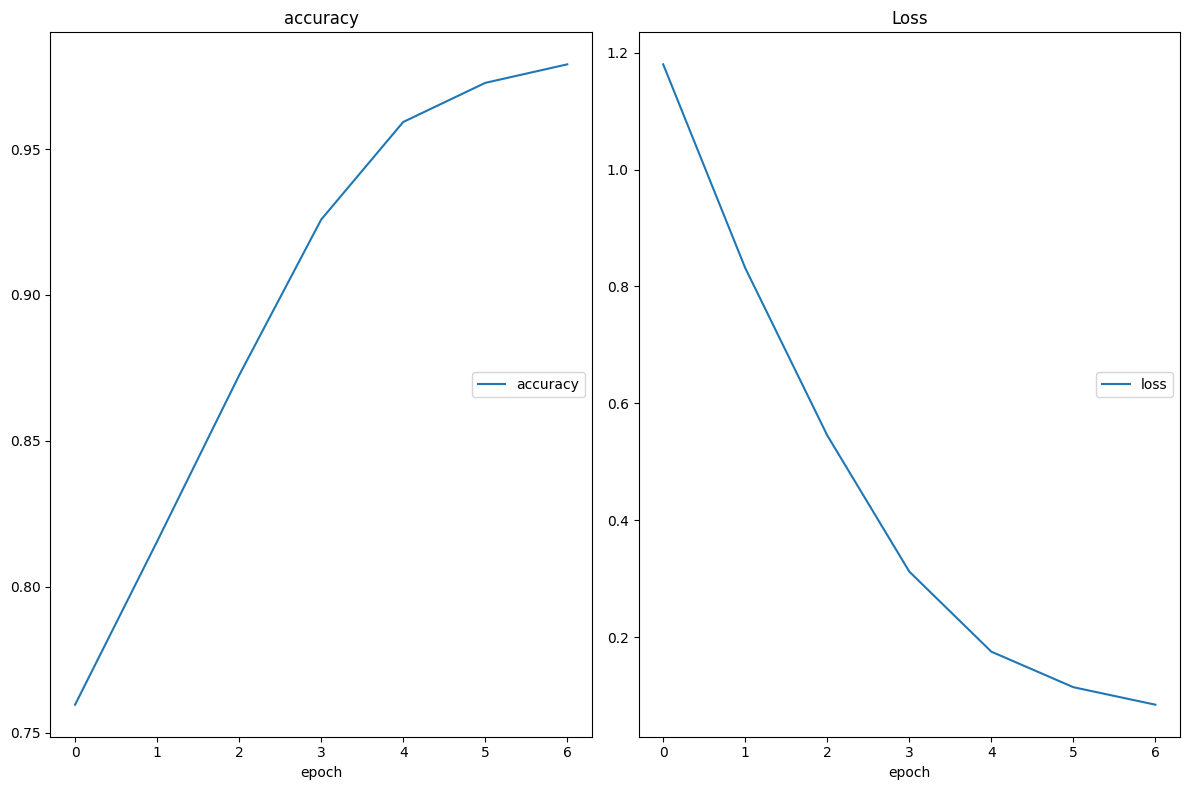

accuracy
	accuracy         	 (min:    0.760, max:    0.979, cur:    0.979)
Loss
	loss             	 (min:    0.085, max:    1.180, cur:    0.085)
152/152 [==============================] - 152s 999ms/step - loss: 0.0848 - accuracy: 0.9790
CPU times: user 23min 43s, sys: 2min 7s, total: 25min 51s
Wall time: 18min 24s


In [23]:
%%time

chkpt = ModelCheckpoint("model_weights.h5", monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=True, mode='min')

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [PlotLossesCallback(), chkpt, early_stopping]

history2 = model2.fit(
    x=X_train_token,
    y=y_train_token,
    batch_size=32,
    epochs=7,
    callbacks=callbacks,
    verbose=1
)

### Conclusion and final results


#### Done!